### Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df=pd.read_csv("./dataset/engineering.csv")
df.sample(6)

,institute_id,name,tlr,rpc,go,oi,perception,city,state,rank
92,IR-E-C-30045,C V Raman Global University,59.49,5.07,58.70,57.65,10.70,Bhubaneswar,Odisha,93
199,IR-E-U-0615,National Institute of Technology Arunachal Pra...,50.56,9.06,39.36,46.21,7.12,Itanagar,Arunachal Pradesh,200
14,IR-E-U-0490,Vellore Institute of Technology,56.79,64.06,63.07,58.21,46.29,Vellore,Tamil Nadu,15
108,IR-E-C-42054,Army Institute of Technology,54.68,2.33,64.18,62.39,6.65,Pune,Maharashtra,109
116,IR-E-U-0223,Jain University,49.08,23.49,46.44,53.20,1.10,Bengluru,Karnataka,117
135,IR-E-U-0854,KLE Technological University,56.85,8.11,48.85,49.29,1.63,Dharwad,Karnataka,136


In [3]:
df.shape

(200, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   institute_id  200 non-null    object 
 1   name          200 non-null    object 
 2   tlr           200 non-null    float64
 3   rpc           200 non-null    float64
 4   go            200 non-null    float64
 5   oi            200 non-null    float64
 6   perception    200 non-null    float64
 7   city          200 non-null    object 
 8   state         200 non-null    object 
 9   rank          200 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

institute_id    0
name            0
tlr             0
rpc             0
go              0
oi              0
perception      0
city            0
state           0
rank            0
dtype: int64

In [6]:
df.describe()

,tlr,rpc,go,oi,perception,rank
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,59.050150,20.307350,56.70360,51.873700,14.214650,100.475000
std,10.152778,19.937026,11.10281,6.853437,19.262625,57.866936
min,35.510000,0.460000,13.06000,33.800000,0.000000,1.000000
25%,52.535000,5.397500,50.11250,47.360000,2.557500,50.750000
50%,57.525000,13.350000,55.07000,51.855000,6.650000,100.500000
75%,64.392500,30.642500,63.09500,56.002500,17.790000,150.250000
max,95.420000,96.150000,89.65000,75.700000,100.000000,200.000000


In [7]:
df.duplicated().sum()

0

In [8]:
clean_df=df.drop(["institute_id","name","city","state"],axis=True)
clean_df.sample(6)

,tlr,rpc,go,oi,perception,rank
60,66.27,20.64,54.64,59.35,7.59,61
23,83.76,34.55,55.15,57.90,38.26,24
121,55.46,15.73,43.96,40.61,12.79,122
48,69.35,19.73,52.14,48.69,51.77,49
56,71.72,29.24,40.88,53.90,11.13,57
68,65.32,10.04,63.72,54.35,5.69,69


### Split Data

In [9]:
X = clean_df.drop('rank', axis=1)
y = clean_df['rank']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (200, 5)
Shape of y =  (200,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (160, 5)
Shape of y_train =  (160,)
Shape of X_test =  (40, 5)
Shape of y_test =  (40,)


### Model Traning with Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
regressorRFR = RandomForestRegressor(n_estimators=100, criterion='squared_error')
regressorRFR.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
regressorRFR.score(X_test, y_test)

0.9395207649409224

In [19]:
y_pred2=regressorRFR.predict(X_test)

In [20]:
#first finding mean square error using mean_squared_error class
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse = mean_squared_error(y_test, y_pred2)
#finding Root mean square error using pandas
rmse = np.sqrt(mse)

print('MSE = ', mse)
print('RMSE = ', rmse)

MSE =  211.57507500000003
RMSE =  14.54562047490584


In [21]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(regressorRFR, X_train, y_train, cv=5, ).mean()

0.9231622993919453

In [22]:
int(regressorRFR.predict([X_test.iloc[18, :]])[0].round())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


121

In [23]:
y_test.iloc[18]

129

### Save the Model

In [24]:
import joblib
joblib.dump(regressorRFR, "college_rank_predictor.pkl")

['college_rank_predictor.pkl']

In [25]:
model = joblib.load("college_rank_predictor.pkl")

In [26]:
model.predict([X_test.iloc[18, :]])[0]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


120.88

In [27]:
feature_importances = model.feature_importances_
feature_names = X.columns

# Combine feature names with their importance scores
feature_importance = dict(zip(feature_names, feature_importances))

# Sort features based on importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')


rpc: 0.5484356819297906
perception: 0.1983665690571723
tlr: 0.15441680186748888
go: 0.07497986007749402
oi: 0.023801087068054137


In [28]:
# Assuming df and df_new are your DataFrames for different years
df_2016=pd.read_csv("./db/2016/EngineeringRanking_2016.csv")
df_2017=pd.read_csv("./db/2017/EngineeringRanking_2017.csv")
df_2018=pd.read_csv("./db/2018/EngineeringRanking_2018.csv")
df_2019=pd.read_csv("./db/2019/EngineeringRanking_2019.csv")
df_2020=pd.read_csv("./db/2020/EngineeringRanking_2020.csv")
df_2021=pd.read_csv("./db/2021/EngineeringRanking_2021.csv")


df_2016['year'] = 1
df_2016['year'] = 2
df_2017['year'] = 3
df_2018['year'] = 4
df_2019['year'] = 5
df_2020['year'] = 6
df_2021['year'] = 7



df_combined = pd.concat([df_2016,df_2017,df_2018,df_2019,df_2020,df_2021], ignore_index=True)
excel_file_path_combined = 'combined_data.xlsx'

# Save the combined DataFrame to Excel
# df_combined.to_excel(excel_file_path_combined, index=False)

# Save the combined DataFrame to CSV
csv_file_path_combined = 'combined_data.csv'
df_combined.to_csv(csv_file_path_combined, index=False)

print(f"Combined DataFrame has been saved to {csv_file_path_combined}")

print(df_combined.columns)

clean_df=df_combined.drop(["Institute Id","Institute Name","City","State","Score"],axis=True)
clean_df.sample(6)

Combined DataFrame has been saved to combined_data.csv
Index(['Institute Id', 'Institute Name', 'City', 'State', 'Score', 'Rank',
       'TLR', 'RPC', 'GO', 'OI', 'Perception', 'year'],
      dtype='object')


,Rank,TLR,RPC,GO,OI,Perception,year
831,132,59.95,6.78,52.91,50.28,7.45,7
241,42,72.70,27.91,55.73,43.77,6.89,4
52,52,57.40,58.47,75.03,66.24,32.00,2
819,120,63.62,32.28,16.04,46.24,5.55,7
278,79,63.79,11.75,46.73,44.42,11.20,4
772,73,64.87,9.13,56.91,53.01,31.01,7


In [29]:



X = clean_df.drop('Rank', axis=1)
y = clean_df['Rank']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)


model_combined = RandomForestRegressor(n_estimators=100, random_state=42)
model_combined.fit(X_train, y_train)
# Assuming X_test and y_test are your test data
print(X_train)


Shape of X =  (900, 6)
Shape of y =  (900,)
Shape of X_train =  (720, 6)
Shape of y_train =  (720,)
Shape of X_test =  (180, 6)
Shape of y_test =  (180,)


       TLR    RPC     GO     OI  Perception  year
152  61.17  18.43  59.99  58.30       10.17     3
411  61.36   2.75  54.70  48.52        0.00     5
364  54.81  14.26  61.96  55.76       18.19     5
327  63.47  28.22  77.01  61.09       36.71     5
597  45.32  22.62  60.94  45.84        5.69     6
..     ...    ...    ...    ...         ...   ...
528  65.95  47.65  65.69  54.82       17.42     6
709  73.15  50.17  78.62  64.54       50.18     7
736  70.69  43.21  62.04  57.79       15.86     7
485  40.58   1.26  61.61  57.60        1.63     5
57   73.56  51.98  75.30  38.57       33.00     2

[720 rows x 6 columns]


In [30]:
predictions_combined = model_combined.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mae_combined = mean_absolute_error(y_test, predictions_combined)
mse_combined = mean_squared_error(y_test, predictions_combined)
r2_combined = r2_score(y_test, predictions_combined)

print(f'Combined Data Mean Absolute Error: {mae_combined}')
print(f'Combined Data Mean Squared Error: {mse_combined}')
print(f'Combined Data R-squared: {r2_combined}')

Combined Data Mean Absolute Error: 9.624222222222222
Combined Data Mean Squared Error: 169.33983444444445
Combined Data R-squared: 0.9443486819241216


In [32]:
import joblib
joblib.dump(model_combined, "college_rank_predictor1.pkl")
model = joblib.load("college_rank_predictor1.pkl")


In [33]:
feature_importances_combined = model_combined.feature_importances_
feature_names_combined = X.columns

# Combine feature names with their importance scores
feature_importance_combined = dict(zip(feature_names_combined, feature_importances_combined))

# Sort features based on importance
sorted_feature_importance_combined = sorted(feature_importance_combined.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance for the combined data
for feature, importance in sorted_feature_importance_combined:
    print(f'{feature}: {importance}')

RPC: 0.5536578536572879
TLR: 0.1669009220544416
Perception: 0.12090170355227531
GO: 0.0792798732701918
year: 0.051763868745086504
OI: 0.02749577872071692


Please enter the features of your college:


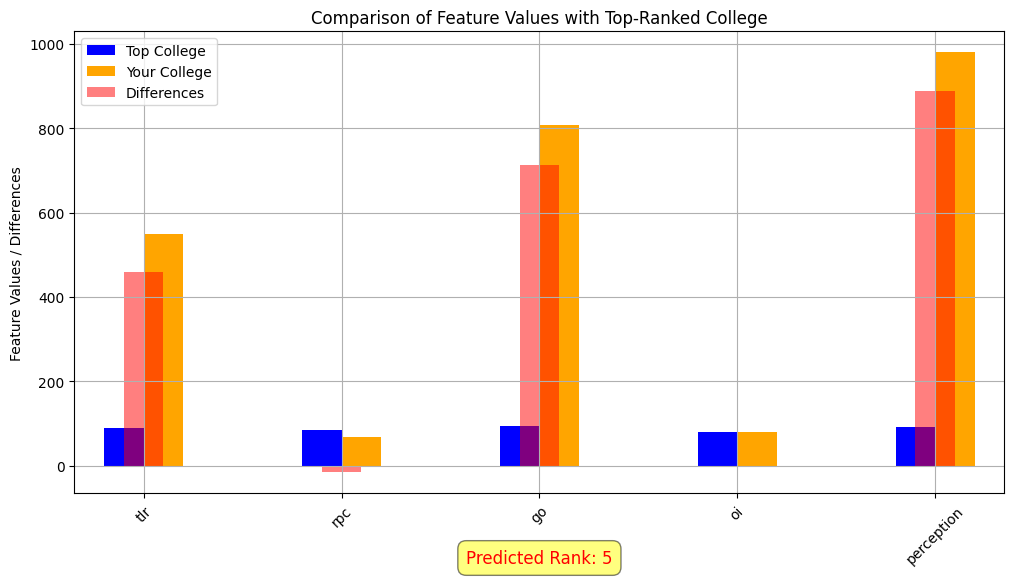

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
# Features of the top-ranked college
top_college_features = {
    'tlr': 90,
    'rpc': 85,
    'go': 95,
    'oi': 80,
    'perception': 92
}

# Function to get user input for their college's features
def get_user_features():
    user_features = {}
    print("Please enter the features of your college:")
    for feature in top_college_features.keys():
        value = float(input(f"Enter value for {feature}: "))
        user_features[feature] = value
    return user_features

# Function to predict rank based on features
def predict_rank(features):
    # Your code to predict rank using ML model based on provided features
    # Replace this with your actual prediction code
    predicted_rank = 5  # Example prediction
    return predicted_rank

# Get user features
user_features = get_user_features()

# Predict rank
predicted_rank = predict_rank(user_features)

# Calculate differences in features
differences = {feature: user_features[feature] - top_college_features[feature] for feature in top_college_features}

# Convert data to DataFrame for plotting
df = pd.DataFrame({'Top College': top_college_features, 'Your College': user_features, 'Differences': differences})

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting feature values and differences
df[['Top College', 'Your College']].plot(kind='bar', ax=ax, color=['blue', 'orange'], width=0.4)
df['Differences'].plot(kind='bar', ax=ax, color='red', alpha=0.5, width=0.2)
ax.set_ylabel('Feature Values / Differences')
ax.set_title('Comparison of Feature Values with Top-Ranked College')

# Annotate predicted rank
ax.annotate(f'Predicted Rank: {predicted_rank}', xy=(0.5, 0), xytext=(0, -40),
            xycoords='axes fraction', textcoords='offset points', ha='center', va='top',
            fontsize=12, color='red', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend(['Top College', 'Your College', 'Differences'])
plt.show()
